1. Import Libraries

In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras

2. Load Data

In [3]:
train = pd.read_csv("./archive (3)/fashion-mnist_train.csv")
test = pd.read_csv("./archive (3)/fashion-mnist_test.csv")


In [4]:
train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
# The catagories of clothing were in dataset
class_labels= ["T-shirt/top","Trouser","Pullover" ,"Dress","Coat" ,"Sandal" ,"Shirt" ,"Sneaker" ,"Bag" ,"Ankle boot"]
class_labels

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [6]:
test.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
# store data as an array 
train_data = np.array(train, dtype= "float32")
test_data = np.array(test, dtype= "float32")

In [8]:
x_train = train_data[:, 1:]
y_train = train_data[:, 0]

In [9]:
x_test = test_data[:, 1:]
y_test = test_data[:, 0]

In [10]:
# arrange pixel values between 0 to 1 
x_train = x_train/255
x_test = x_test/255

3. Split Data

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
x_train , x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2)

In [13]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
x_val = x_val.reshape(x_val.shape[0], 28, 28, 1)

8.0


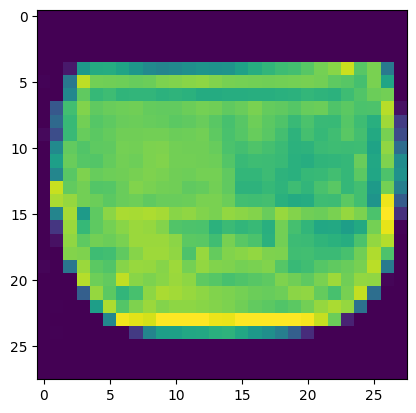

In [14]:
import matplotlib.pyplot as plt 

plt.imshow(x_train[1])
print(y_train[1])

4. Build Deep Learning Model and Train the Model

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

model = Sequential([
    Conv2D(filters=32, kernel_size=3, strides=(1,1), padding='valid', activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2,2)),
    Conv2D(filters=64, kernel_size=3, strides=(2,2), padding='same', activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.25),
    Dense(256, activation='relu'),
    Dropout(0.25),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')  
])


c:\Priyansh\2ndyear\Lab5\ImageClassification-main\.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [16]:
model.compile(optimizer='adam', 
                loss=tf.keras.losses.SparseCategoricalCrossentropy(),  # Use SparseCategoricalCrossentropy for multi-class classification
                metrics=[tf.keras.metrics.SparseCategoricalAccuracy()])


In [17]:
model.fit(x_train, y_train, epochs=20, batch_size=16, verbose=1, validation_data=(x_val, y_val))


Epoch 1/20
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - loss: 0.7982 - sparse_categorical_accuracy: 0.6996 - val_loss: 0.3669 - val_sparse_categorical_accuracy: 0.8643
Epoch 2/20
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - loss: 0.3889 - sparse_categorical_accuracy: 0.8569 - val_loss: 0.3129 - val_sparse_categorical_accuracy: 0.8852
Epoch 3/20
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - loss: 0.3306 - sparse_categorical_accuracy: 0.8780 - val_loss: 0.3242 - val_sparse_categorical_accuracy: 0.8791
Epoch 4/20
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - loss: 0.2993 - sparse_categorical_accuracy: 0.8901 - val_loss: 0.2917 - val_sparse_categorical_accuracy: 0.8924
Epoch 5/20
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - loss: 0.2797 - sparse_categorical_accuracy: 0.8970 - val_loss: 0.2733 - val_sparse_categorical_accuracy: 0.8994
Epoch 6/20
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - loss: 0.2596 - sparse_categorical_accuracy: 0.9051 - val_loss: 0.2781 - val_sparse_categorical_accuracy

5. Test Model 

In [18]:
y_pred = model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [19]:
model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.2823 - sparse_categorical_accuracy: 0.9078


[0.2781306505203247, 0.9146000146865845]

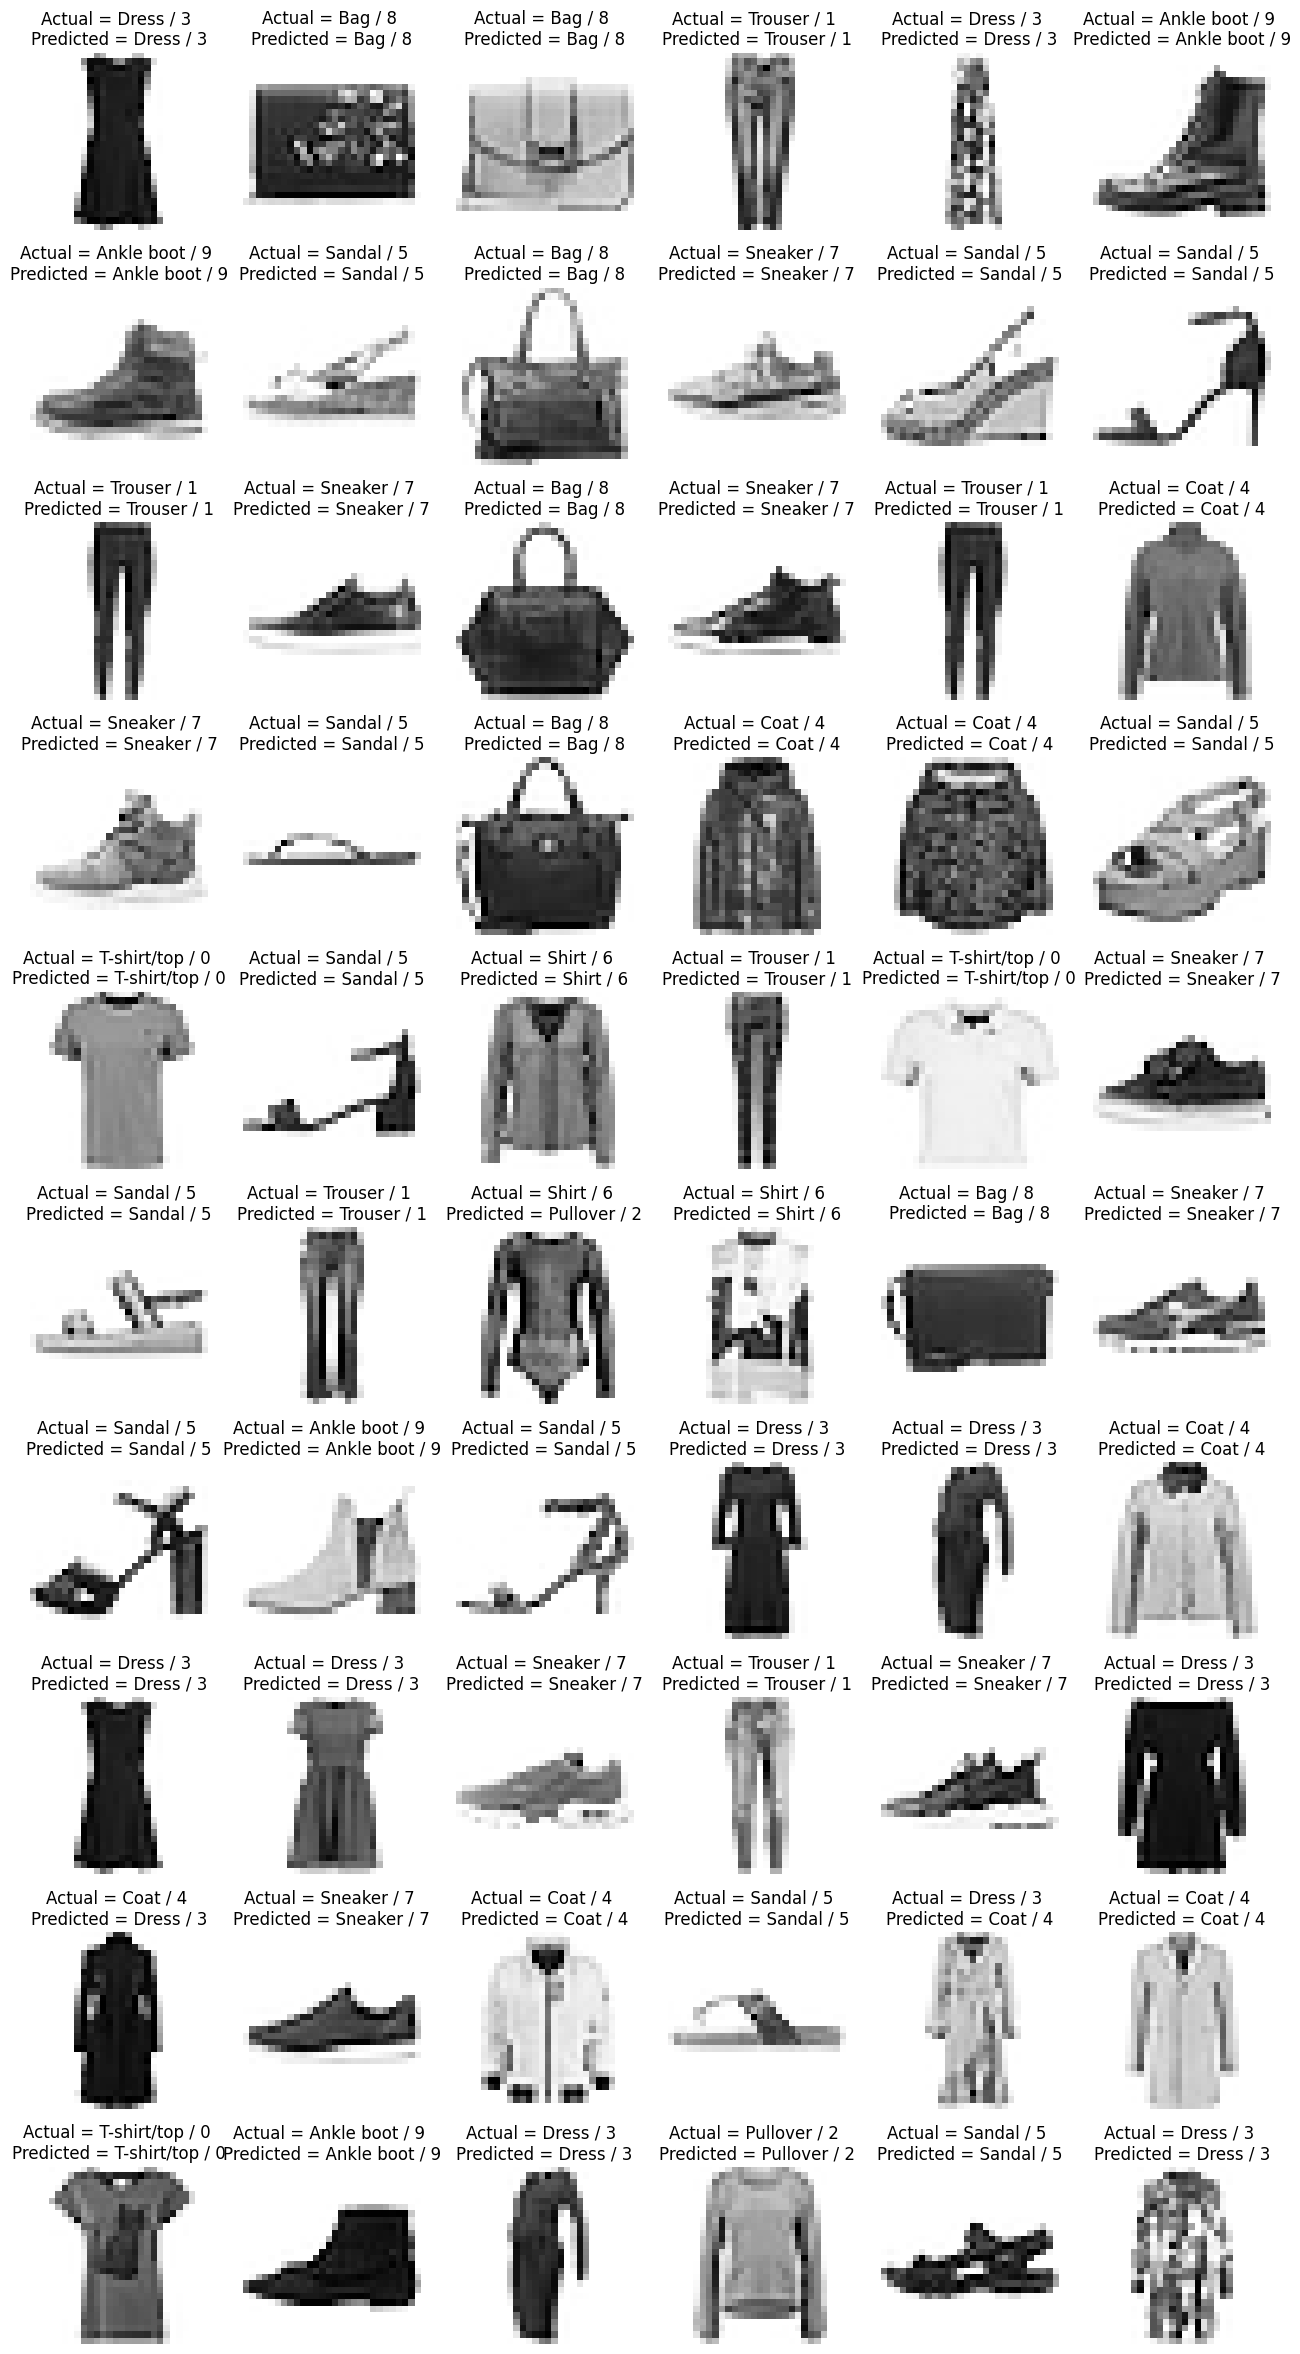

In [20]:
# Plot the training and validation accuracy and loss
import matplotlib.pyplot as plt

plt.figure(figsize= (16,30))
j=1

for i in np.random.randint(0, 1000,60):
    plt.subplot(10,6, j)
    j+=1
    plt.imshow(x_test[i].reshape(28,28), cmap='Greys')
    plt.title('Actual = {} / {} \nPredicted = {} / {}'.format(class_labels[int(y_test[i])], int(y_test[i]), class_labels[np.argmax(y_pred[i])], np.argmax(y_pred[i])))
    plt.axis('off')


6. Evaluate 

In [21]:
from sklearn.metrics import classification_report, accuracy_score

# Convert one-hot encoded labels to class indices if needed
if y_test.ndim == 2 and y_test.shape[1] > 1:
    y_test_indices = np.argmax(y_test, axis=1)
else:
    y_test_indices = y_test  # If y_test is already in integer form

# Convert y_pred to class indices
y_pred_indices = np.argmax(y_pred, axis=1)

# Generate the classification report
cr = classification_report(y_test_indices, y_pred_indices, target_names=class_labels)
print(cr)

# Calculate and print the overall accuracy
accuracy = accuracy_score(y_test_indices, y_pred_indices)
print(f"Overall Accuracy: {accuracy}")

              precision    recall  f1-score   support

 T-shirt/top       0.85      0.87      0.86      1000
     Trouser       0.99      0.99      0.99      1000
    Pullover       0.90      0.83      0.86      1000
       Dress       0.87      0.96      0.91      1000
        Coat       0.89      0.85      0.87      1000
      Sandal       0.98      0.98      0.98      1000
       Shirt       0.76      0.76      0.76      1000
     Sneaker       0.96      0.96      0.96      1000
         Bag       0.98      0.98      0.98      1000
  Ankle boot       0.97      0.97      0.97      1000

    accuracy                           0.91     10000
   macro avg       0.92      0.91      0.91     10000
weighted avg       0.92      0.91      0.91     10000

Overall Accuracy: 0.9146


7. Save Model

In [22]:
# Save Model
model.save('fashion_mnist_cnn_model.h5')

In [23]:
#Load Model

fashion_model = tf.keras.models.load_model('fashion_mnist_cnn_model.h5')
